### 시간대별 승하차 승객수 추이 시각화


In [1]:
import csv
import matplotlib.pyplot as plt

### 주어진 숫자문자열에서 ' ,' 제거, 정수형으로 변환 '2,347' => 2347

In [6]:
def str_to_int(data):
    return int(data.replace(',', ''))

['1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '0시']


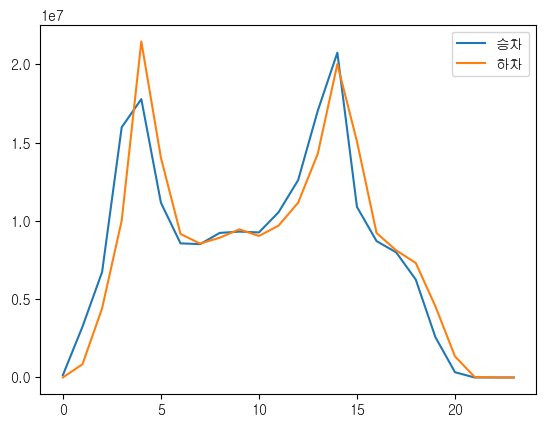

In [20]:
with open('../0905-09/data/202308_time.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    #시간대별 승/하차 승객수
    persons_in = [0] * 24
    persons_out = [0] * 24
    
    for row in data:
        # 4시 ~ 3시 승객수 ','제거, 정수 변환
        row[4:] = map(str_to_int, row[4:])
        # 시간대별 승객수 총합
        for i in range(24):
            persons_in[i] += row[4 + 2 * i]
            persons_out[i] += row[5 + 2 *i]
            
#     print(persons_out) 
#     print(persons_in)
titles = [str((i+1) % 24) + '시' for i in range(24)]
print(titles)
plt.rc('font', family='gulim')
plt.plot(range(24), persons_in, label = '승차')
plt.plot(range(24), persons_out, label = '하차')
plt.legend()

### 시간대별 승/하차가 가장 많은 역

4시 : 경부선구로 12237명
5시 : 경인선부천 38101명
6시 : 2호선신림 70796명
7시 : 2호선신림 186200명
8시 : 2호선신림 267850명
9시 : 2호선신림 159802명
10시 : 2호선신림 87820명
11시 : 2호선잠실(송파구청) 79318명
12시 : 2호선잠실(송파구청) 89447명
13시 : 2호선강남 102025명
14시 : 2호선강남 112582명
15시 : 2호선강남 135730명
16시 : 2호선강남 165359명
17시 : 2호선강남 255070명
18시 : 2호선삼성(무역센터) 326888명
19시 : 2호선강남 208701명
20시 : 2호선잠실(송파구청) 165968명
21시 : 2호선홍대입구 187157명
22시 : 2호선홍대입구 183147명
23시 : 2호선홍대입구 92368명
0시 : 2호선강남 12953명
1시 : 일산선대화 8명
2시 : 3호선지축 3명
3시 : 9호선개화 3명


([<matplotlib.axis.XTick at 0x1ee7bc1d570>,
 [Text(0, 0, '경부선구로'),
  Text(1, 0, '경인선부천'),
  Text(2, 0, '2호선신림'),
  Text(3, 0, '2호선신림'),
  Text(4, 0, '2호선신림'),
  Text(5, 0, '2호선신림'),
  Text(6, 0, '2호선신림'),
  Text(7, 0, '2호선잠실(송파구청)'),
  Text(8, 0, '2호선잠실(송파구청)'),
  Text(9, 0, '2호선강남'),
  Text(10, 0, '2호선강남'),
  Text(11, 0, '2호선강남'),
  Text(12, 0, '2호선강남'),
  Text(13, 0, '2호선강남'),
  Text(14, 0, '2호선삼성(무역센터)'),
  Text(15, 0, '2호선강남'),
  Text(16, 0, '2호선잠실(송파구청)'),
  Text(17, 0, '2호선홍대입구'),
  Text(18, 0, '2호선홍대입구'),
  Text(19, 0, '2호선홍대입구'),
  Text(20, 0, '2호선강남'),
  Text(21, 0, '일산선대화'),
  Text(22, 0, '3호선지축'),
  Text(23, 0, '9호선개화')])

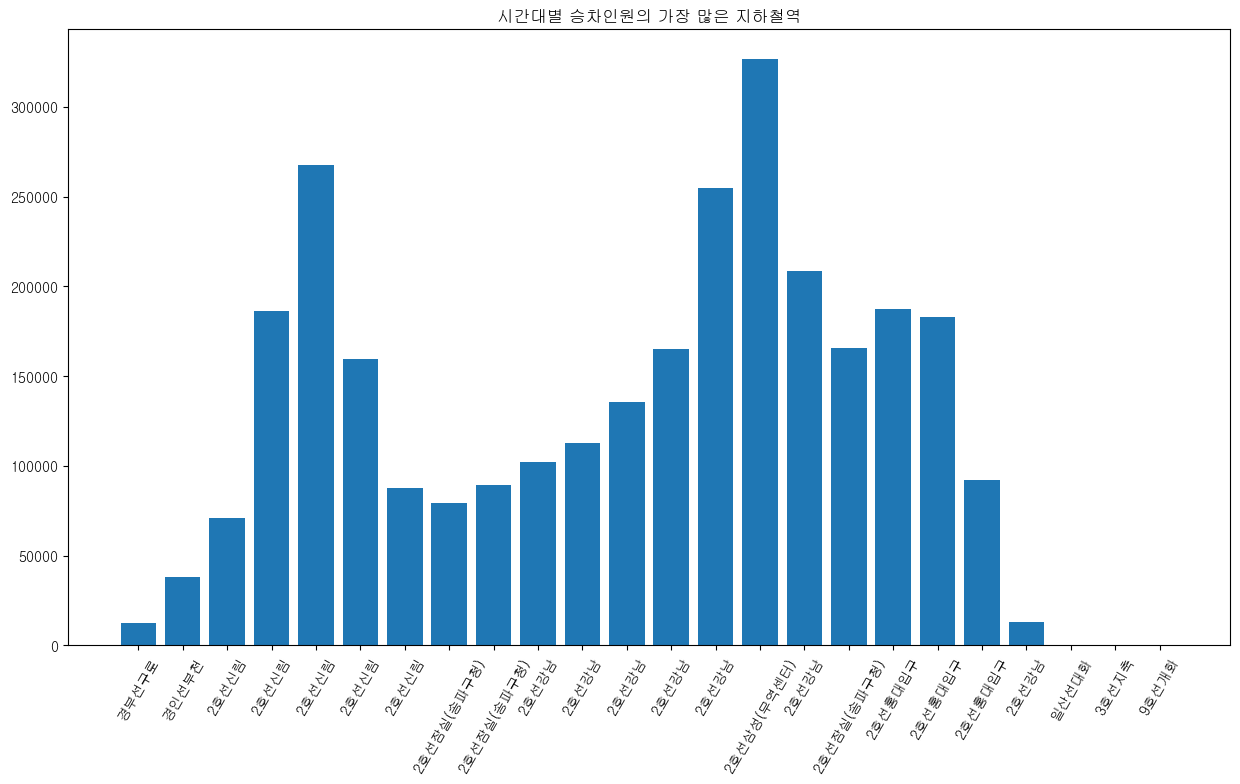

In [34]:
with open('../0905-09/data/202308_time.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    #시간대별 승/하차 승객수
    max_persons_in = [0] * 24
    max_persons_out = [0] * 24
    station_in = [''] * 24
    station_out = [''] * 24
    
    for row in data:
        # 4시 ~ 3시 승객수 ','제거, 정수 변환
        row[4:] = map(str_to_int, row[4:])
        # 시간대별 승객수 총합
        for i in range(24):
            if max_persons_in[i] < row[4 + 2 * i]:
                max_persons_in[i] = row[4 + 2 * i]
                station_in[i] = f'{row[1]}{row[3]}'

    for i in range(24):
        print(f'{(i+4) % 24}시 : {station_in[i]} {max_persons_in[i]}명')
#         station_in[i] = f'{(i+4) % 24}시-{station_in[i]}'

plt.figure(figsize=(15,8))
plt.title('시간대별 승차인원의 가장 많은 지하철역')
# plt.bar(station_in, max_persons_in)
# plt.xticks(rotation=60)
plt.bar(range(24), max_persons_in)
plt.xticks(range(24), station_in, rotation=60)